Задание 1:

Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

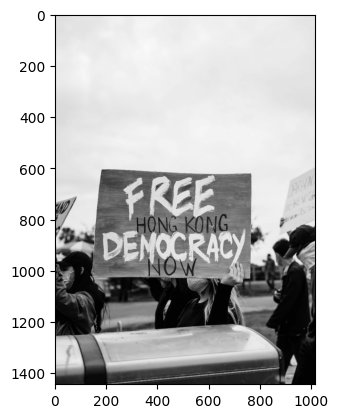

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.cvtColor(cv.imread("sample_data/hong.png"), cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

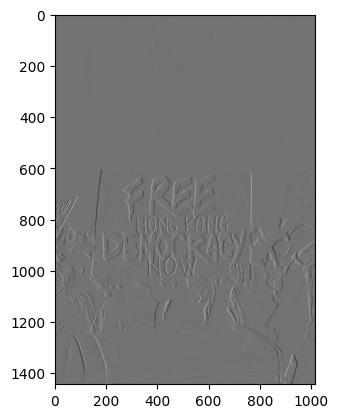

In [3]:
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=1)
plt.imshow(sobelx, cmap="gray")

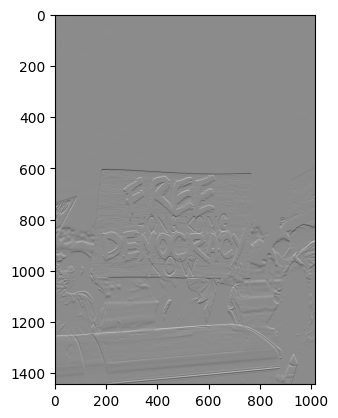

In [4]:
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=1)
plt.imshow(sobely, cmap="gray")

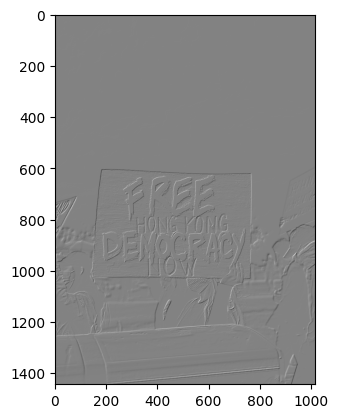

In [5]:
sobel_2 = cv.addWeighted(sobelx, 0.8, sobely, 0.8, 0)
plt.imshow(sobel_2, cmap="gray")

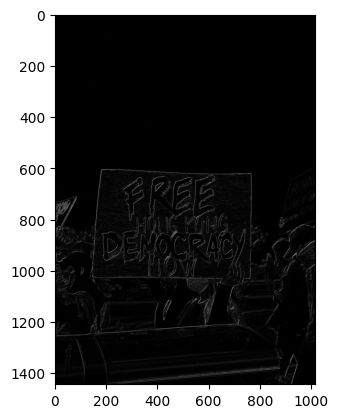

In [6]:
plt.imshow(cv.convertScaleAbs(sobel_2), cmap="gray")

Задание 2:

На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

In [ ]:
def update_image(*args):
    lower_threshold = cv.getTrackbarPos('Lower Threshold', 'Filter Parameters')
    upper_threshold = cv.getTrackbarPos('Upper Threshold', 'Filter Parameters')

    edges = cv.Canny(image, lower_threshold, upper_threshold)

    cv.imshow('Filtered Image', edges)

image = cv.cvtColor(cv.imread("sample_data/hong.png"), cv.COLOR_BGR2GRAY)

cv.namedWindow('Filter Parameters')
cv.resizeWindow('Filter Parameters', 400, 150)

cv.createTrackbar('Lower Threshold', 'Filter Parameters', 0, 255, update_image)
cv.createTrackbar('Upper Threshold', 'Filter Parameters', 0, 255, update_image)

update_image()

cv.waitKey(0)
cv.destroyAllWindows()


Задание 3:

К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом

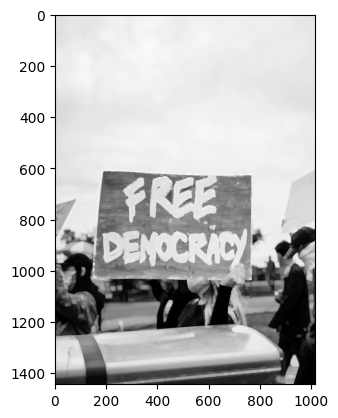

In [10]:
img = cv.imread("sample_data/hong.png", 0)
kernel = np.ones((2,2),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 7)
plt.imshow(dilation, cmap="gray")